In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# ระบุตำแหน่ง ไฟล์

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# คลาส

In [3]:
NUM_CLASSES = 5

# อ่านค่า Data set

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# การเปิดใช้งานและสร้างเลเยอร์ 

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1,125
Trainable params: 1,125
Non-trainable params: 0
_________________________________________________________________


In [9]:
# ตรวจสอบโมเดลและเรียกกลับ
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# รวมรวมแบบจำลองโมเดล
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.8813 - accuracy: 0.1172
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 1s 260ms/step - loss: 1.8562 - accuracy: 0.1235 - val_loss: 1.7255 - val_accuracy: 0.1481
Epoch 2/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.8262 - accuracy: 0.1484
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 61ms/step - loss: 1.8177 - accuracy: 0.1420 - val_loss: 1.7096 - val_accuracy: 0.1481
Epoch 3/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.8905 - accuracy: 0.1172
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 1.8692 - accuracy: 0.1173 - val_loss: 1.6952 - val_accuracy: 0.1481
Epoch 4/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.7657 - accuracy: 0.1719
Epoch 4: sa

2/2 [==============================] - 0s 54ms/step - loss: 1.5764 - accuracy: 0.2654 - val_loss: 1.5360 - val_accuracy: 0.4444
Epoch 29/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.5639 - accuracy: 0.3047
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 53ms/step - loss: 1.5611 - accuracy: 0.3210 - val_loss: 1.5305 - val_accuracy: 0.4259
Epoch 30/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.5811 - accuracy: 0.2188
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 54ms/step - loss: 1.5674 - accuracy: 0.2593 - val_loss: 1.5251 - val_accuracy: 0.4259
Epoch 31/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.5505 - accuracy: 0.3047
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 1.5509 - accuracy: 0.3025 - val_loss: 1.

Epoch 56/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.4868 - accuracy: 0.4141
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 51ms/step - loss: 1.4731 - accuracy: 0.4074 - val_loss: 1.4195 - val_accuracy: 0.4259
Epoch 57/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.4109 - accuracy: 0.4141
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 54ms/step - loss: 1.4061 - accuracy: 0.4259 - val_loss: 1.4151 - val_accuracy: 0.4630
Epoch 58/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.4900 - accuracy: 0.3516
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 1.4879 - accuracy: 0.3519 - val_loss: 1.4107 - val_accuracy: 0.4630
Epoch 59/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.4455 - accuracy: 0.4375
Epoch

1/2 [==============>...............] - ETA: 0s - loss: 1.4037 - accuracy: 0.4141
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 1.3749 - accuracy: 0.4259 - val_loss: 1.3215 - val_accuracy: 0.5926
Epoch 84/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.3730 - accuracy: 0.4141
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 60ms/step - loss: 1.3727 - accuracy: 0.4198 - val_loss: 1.3178 - val_accuracy: 0.5926
Epoch 85/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.3984 - accuracy: 0.3984
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 51ms/step - loss: 1.4136 - accuracy: 0.3951 - val_loss: 1.3144 - val_accuracy: 0.5926
Epoch 86/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.3409 - accuracy: 0.4375
Epoch 86: saving mo

1/2 [==============>...............] - ETA: 0s - loss: 1.3435 - accuracy: 0.4141
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 53ms/step - loss: 1.3380 - accuracy: 0.4383 - val_loss: 1.2366 - val_accuracy: 0.5926
Epoch 111/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.2545 - accuracy: 0.5234
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 1.2639 - accuracy: 0.5000 - val_loss: 1.2324 - val_accuracy: 0.5926
Epoch 112/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.3535 - accuracy: 0.4531
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 52ms/step - loss: 1.3387 - accuracy: 0.4753 - val_loss: 1.2286 - val_accuracy: 0.5926
Epoch 113/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.2576 - accuracy: 0.5156
Epoch 113: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.2753 - accuracy: 0.5547
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 49ms/step - loss: 1.2481 - accuracy: 0.5617 - val_loss: 1.1363 - val_accuracy: 0.5926
Epoch 138/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.2797 - accuracy: 0.5469
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 54ms/step - loss: 1.2085 - accuracy: 0.6049 - val_loss: 1.1311 - val_accuracy: 0.6481
Epoch 139/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.1948 - accuracy: 0.5312
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 53ms/step - loss: 1.2149 - accuracy: 0.5000 - val_loss: 1.1265 - val_accuracy: 0.6667
Epoch 140/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.2133 - accuracy: 0.5703
Epoch 140: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.1425 - accuracy: 0.5234
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 52ms/step - loss: 1.1337 - accuracy: 0.5247 - val_loss: 0.9799 - val_accuracy: 0.6667
Epoch 165/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.1688 - accuracy: 0.5234
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 1.1518 - accuracy: 0.5370 - val_loss: 0.9731 - val_accuracy: 0.6852
Epoch 166/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.1951 - accuracy: 0.5312
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 1.1783 - accuracy: 0.5309 - val_loss: 0.9669 - val_accuracy: 0.6852
Epoch 167/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.1303 - accuracy: 0.5859
Epoch 167: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.0123 - accuracy: 0.5938
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 1.0090 - accuracy: 0.6049 - val_loss: 0.8378 - val_accuracy: 0.7222
Epoch 192/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0589 - accuracy: 0.5781
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 76ms/step - loss: 1.0541 - accuracy: 0.6111 - val_loss: 0.8322 - val_accuracy: 0.7222
Epoch 193/1000
1/2 [==============>...............] - ETA: 0s - loss: 1.0775 - accuracy: 0.5547
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 1.0542 - accuracy: 0.5741 - val_loss: 0.8273 - val_accuracy: 0.7222
Epoch 194/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9883 - accuracy: 0.6406
Epoch 194: sa

1/2 [==============>...............] - ETA: 0s - loss: 1.0102 - accuracy: 0.6016
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 1.0012 - accuracy: 0.5988 - val_loss: 0.7004 - val_accuracy: 0.8333
Epoch 219/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9231 - accuracy: 0.6562
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 54ms/step - loss: 0.9695 - accuracy: 0.6296 - val_loss: 0.6947 - val_accuracy: 0.8333
Epoch 220/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9010 - accuracy: 0.6719
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 0.8696 - accuracy: 0.6790 - val_loss: 0.6882 - val_accuracy: 0.8333
Epoch 221/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9443 - accuracy: 0.6562
Epoch 221: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.8192 - accuracy: 0.7109
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 54ms/step - loss: 0.8758 - accuracy: 0.6728 - val_loss: 0.5469 - val_accuracy: 0.8704
Epoch 246/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8202 - accuracy: 0.7188
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 0.8162 - accuracy: 0.7099 - val_loss: 0.5412 - val_accuracy: 0.8704
Epoch 247/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9142 - accuracy: 0.6562
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 53ms/step - loss: 0.9428 - accuracy: 0.6420 - val_loss: 0.5353 - val_accuracy: 0.8704
Epoch 248/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8637 - accuracy: 0.7188
Epoch 248: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.8152 - accuracy: 0.6719
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 0.8110 - accuracy: 0.6790 - val_loss: 0.4490 - val_accuracy: 0.8889
Epoch 273/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7487 - accuracy: 0.7188
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 57ms/step - loss: 0.7688 - accuracy: 0.7222 - val_loss: 0.4469 - val_accuracy: 0.8889
Epoch 274/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.8445 - accuracy: 0.6797
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 63ms/step - loss: 0.8507 - accuracy: 0.6667 - val_loss: 0.4457 - val_accuracy: 0.8889
Epoch 275/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.9082 - accuracy: 0.6484
Epoch 275: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.8258 - accuracy: 0.7188
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 58ms/step - loss: 0.7946 - accuracy: 0.7160 - val_loss: 0.3857 - val_accuracy: 0.9259
Epoch 300/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7096 - accuracy: 0.7109
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 0.7304 - accuracy: 0.7099 - val_loss: 0.3847 - val_accuracy: 0.9259
Epoch 301/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7323 - accuracy: 0.7578
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 0.7195 - accuracy: 0.7469 - val_loss: 0.3835 - val_accuracy: 0.9259
Epoch 302/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5981 - accuracy: 0.7500
Epoch 302: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.6691 - accuracy: 0.7422
Epoch 326: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 0.6852 - accuracy: 0.7407 - val_loss: 0.3207 - val_accuracy: 0.9444
Epoch 327/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7609 - accuracy: 0.7266
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 52ms/step - loss: 0.7356 - accuracy: 0.7346 - val_loss: 0.3187 - val_accuracy: 0.9630
Epoch 328/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6974 - accuracy: 0.7812
Epoch 328: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 54ms/step - loss: 0.6690 - accuracy: 0.7963 - val_loss: 0.3166 - val_accuracy: 1.0000
Epoch 329/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6745 - accuracy: 0.7734
Epoch 329: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.6712 - accuracy: 0.7266
Epoch 353: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 54ms/step - loss: 0.6543 - accuracy: 0.7346 - val_loss: 0.2974 - val_accuracy: 0.9630
Epoch 354/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6579 - accuracy: 0.7578
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 53ms/step - loss: 0.6412 - accuracy: 0.7716 - val_loss: 0.2952 - val_accuracy: 0.9444
Epoch 355/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7009 - accuracy: 0.7500
Epoch 355: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 51ms/step - loss: 0.6867 - accuracy: 0.7407 - val_loss: 0.2933 - val_accuracy: 0.9444
Epoch 356/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6306 - accuracy: 0.7578
Epoch 356: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.6764 - accuracy: 0.7422
Epoch 380: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 0.6415 - accuracy: 0.7716 - val_loss: 0.2793 - val_accuracy: 0.9815
Epoch 381/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7251 - accuracy: 0.7266
Epoch 381: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 0.6931 - accuracy: 0.7284 - val_loss: 0.2791 - val_accuracy: 0.9815
Epoch 382/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5757 - accuracy: 0.7969
Epoch 382: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 53ms/step - loss: 0.5741 - accuracy: 0.8025 - val_loss: 0.2787 - val_accuracy: 0.9815
Epoch 383/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6256 - accuracy: 0.8047
Epoch 383: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.6173 - accuracy: 0.7734
Epoch 407: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 49ms/step - loss: 0.5994 - accuracy: 0.7901 - val_loss: 0.2476 - val_accuracy: 1.0000
Epoch 408/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6180 - accuracy: 0.7734
Epoch 408: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 49ms/step - loss: 0.6114 - accuracy: 0.7778 - val_loss: 0.2475 - val_accuracy: 1.0000
Epoch 409/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7782 - accuracy: 0.7344
Epoch 409: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 0.7368 - accuracy: 0.7654 - val_loss: 0.2484 - val_accuracy: 1.0000
Epoch 410/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.7154 - accuracy: 0.7578
Epoch 410: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.5982 - accuracy: 0.7578
Epoch 434: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 50ms/step - loss: 0.5974 - accuracy: 0.7593 - val_loss: 0.2174 - val_accuracy: 1.0000
Epoch 435/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5605 - accuracy: 0.7812
Epoch 435: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 59ms/step - loss: 0.5836 - accuracy: 0.7716 - val_loss: 0.2178 - val_accuracy: 1.0000
Epoch 436/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5993 - accuracy: 0.7500
Epoch 436: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 44ms/step - loss: 0.5672 - accuracy: 0.7778 - val_loss: 0.2184 - val_accuracy: 1.0000
Epoch 437/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5618 - accuracy: 0.8047
Epoch 437: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.5878 - accuracy: 0.7656
Epoch 461: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 51ms/step - loss: 0.6168 - accuracy: 0.7593 - val_loss: 0.1984 - val_accuracy: 1.0000
Epoch 462/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5700 - accuracy: 0.7734
Epoch 462: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 35ms/step - loss: 0.5851 - accuracy: 0.7654 - val_loss: 0.1984 - val_accuracy: 1.0000
Epoch 463/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6046 - accuracy: 0.7969
Epoch 463: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 49ms/step - loss: 0.6089 - accuracy: 0.7840 - val_loss: 0.1982 - val_accuracy: 1.0000
Epoch 464/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.4766 - accuracy: 0.8359
Epoch 464: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.5864 - accuracy: 0.7812
Epoch 488: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 53ms/step - loss: 0.5465 - accuracy: 0.8086 - val_loss: 0.1754 - val_accuracy: 1.0000
Epoch 489/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6343 - accuracy: 0.7578
Epoch 489: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 53ms/step - loss: 0.6416 - accuracy: 0.7531 - val_loss: 0.1748 - val_accuracy: 1.0000
Epoch 490/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5713 - accuracy: 0.7969
Epoch 490: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 54ms/step - loss: 0.5983 - accuracy: 0.7840 - val_loss: 0.1743 - val_accuracy: 1.0000
Epoch 491/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5479 - accuracy: 0.8281
Epoch 491: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.5517 - accuracy: 0.8047
Epoch 515: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 53ms/step - loss: 0.5188 - accuracy: 0.8210 - val_loss: 0.1646 - val_accuracy: 1.0000
Epoch 516/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.4589 - accuracy: 0.8125
Epoch 516: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 73ms/step - loss: 0.4864 - accuracy: 0.7963 - val_loss: 0.1632 - val_accuracy: 1.0000
Epoch 517/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.4786 - accuracy: 0.8281
Epoch 517: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 52ms/step - loss: 0.4576 - accuracy: 0.8333 - val_loss: 0.1619 - val_accuracy: 1.0000
Epoch 518/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5257 - accuracy: 0.7812
Epoch 518: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.4515 - accuracy: 0.8438
Epoch 542: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 54ms/step - loss: 0.5209 - accuracy: 0.8086 - val_loss: 0.1511 - val_accuracy: 1.0000
Epoch 543/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.4463 - accuracy: 0.8750
Epoch 543: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 0.4290 - accuracy: 0.8827 - val_loss: 0.1490 - val_accuracy: 1.0000
Epoch 544/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.4164 - accuracy: 0.8516
Epoch 544: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 51ms/step - loss: 0.3948 - accuracy: 0.8765 - val_loss: 0.1469 - val_accuracy: 1.0000
Epoch 545/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.6187 - accuracy: 0.7812
Epoch 545: sa

1/2 [==============>...............] - ETA: 0s - loss: 0.4810 - accuracy: 0.8281
Epoch 569: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 50ms/step - loss: 0.4974 - accuracy: 0.8086 - val_loss: 0.1383 - val_accuracy: 1.0000
Epoch 570/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5419 - accuracy: 0.8203
Epoch 570: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 52ms/step - loss: 0.5858 - accuracy: 0.7963 - val_loss: 0.1379 - val_accuracy: 1.0000
Epoch 571/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5042 - accuracy: 0.8203
Epoch 571: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
2/2 [==============================] - 0s 55ms/step - loss: 0.4986 - accuracy: 0.8333 - val_loss: 0.1375 - val_accuracy: 1.0000
Epoch 572/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5129 - accuracy: 0.7891
Epoch 572: sa

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

1/1 [==============================] - 0s 25ms/step - loss: 0.1381 - accuracy: 1.0000


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 74ms/step
[0.01334024 0.26408848 0.03504541 0.04090393 0.64662194]
4


# Confusion matrix

2/2 [==============================] - 0s 2ms/step


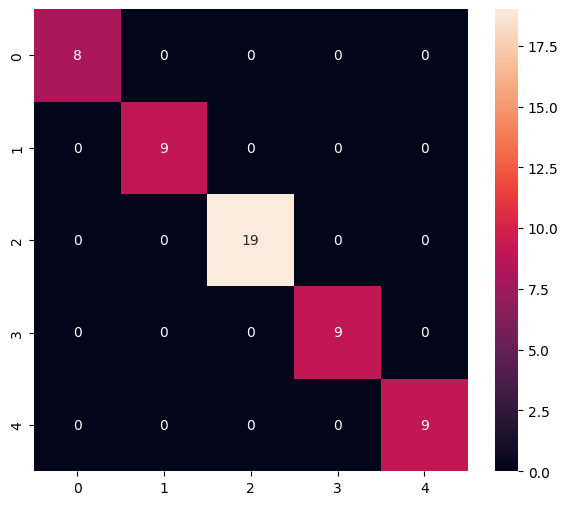

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         9

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# แปลงโมเดล สำหรับ Tensor Flow lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\NongPO\AppData\Local\Temp\tmpxilvq1k9\assets


INFO:tensorflow:Assets written to: C:\Users\NongPO\AppData\Local\Temp\tmpxilvq1k9\assets


6588

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 993 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.01334024 0.2640884  0.03504541 0.04090395 0.64662194]
4
